In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)

In [110]:
dataset = pd.read_excel("영화 데이터.xlsx")

In [111]:
dataset.shape

(40940, 18)

In [112]:
# 영화 개봉 후 발생하는 데이터 제거

dataset = dataset.drop(['순위', '매출액', '점유율', '관객수', '누적관객수', '스크린수', '상영횟수', '국적'], axis=1)

In [113]:
dataset.dtypes

영화명              object
개봉일      datetime64[ns]
누적매출액             int64
대표국적             object
제작사              object
배급사              object
등급               object
장르               object
감독               object
배우               object
dtype: object

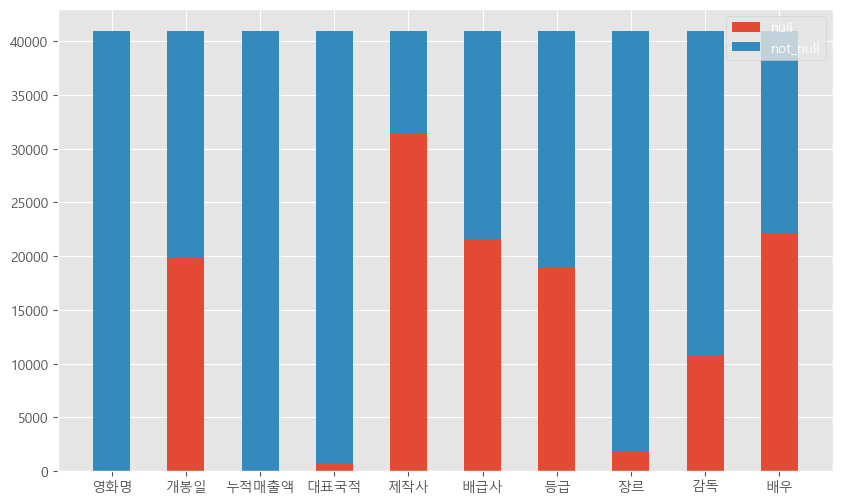

In [114]:
# 결측치 비교

null = dataset.isnull().sum()
not_null = dataset.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(dataset.columns, null, label='null', width=0.5)
plt.bar(dataset.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [115]:
df = dataset.copy()

In [116]:
# 제작사 결측치가 대부분이라서 삭제

df = df.drop(['제작사'], axis=1)

In [117]:
# 배우 5명까지 새로운 열로 추가하고 기존 배우 열 삭제

for i in range(1, 6):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]

df = df.drop(['배우'], axis=1)

In [118]:
# 원-핫 인코딩, 장르를 더미변수로 생성하고 기존 장르 열 삭제

genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df = df.drop(['장르'], axis=1)

In [119]:
# 감독 1명만 남김

df['감독'] = df['감독'].str.split(',').str[0]

In [120]:
# 배급사 1개만 남김

df['배급사'] = df['배급사'].str.split(',').str[0]

In [121]:
# 관람 등급 1개만 남김

df['등급'] = df['등급'].str.split(',').str[0]

In [122]:
# 개봉일 결측치
df['개봉일'].fillna('1900-01-01', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11772\1379489020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['개봉일'].fillna('1900-01-01', inplace=True)


In [123]:
df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df['요일'] = df['개봉일'].dt.weekday    # 0 = 월요일 ~
df = df.drop(['개봉일'], axis=1)

In [124]:
# 누적매출액 없는 행 삭제
df.drop(df[df['누적매출액'] <= 0].index, inplace=True)

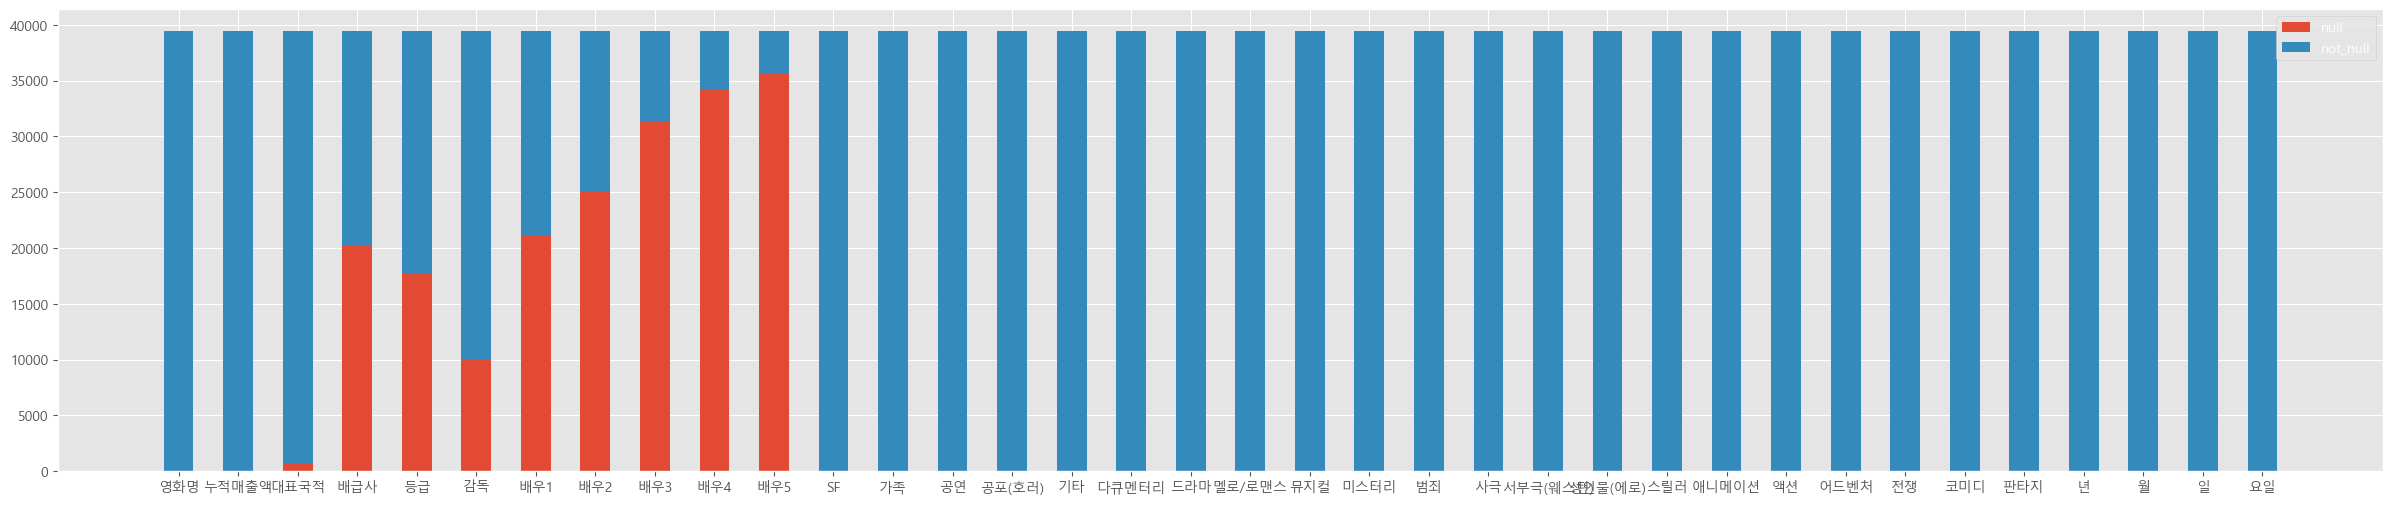

In [125]:
null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [126]:
df.head(1)

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,배우4,배우5,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일
0,태극기 휘날리며,15687180500,한국,(주)다자인소프트,15세관람가,강제규,장동건,원빈,이은주,공형진,조원희,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3


In [128]:
categories = df.columns[df.dtypes == "object"]
print(categories)

Index(['영화명', '대표국적', '배급사', '등급', '감독', '배우1', '배우2', '배우3', '배우4', '배우5'], dtype='object')


In [ ]:
# 카테고리 변수 수치형으로 변환
from sklearn.preprocessing import LabelEncoder

for cat in categories:
    le = LabelEncoder()

    df[cat].fillna("NaN", inplace=True)
    df[cat] = df[cat].astype(str)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

In [130]:
df.head()

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,배우4,배우5,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일
0,28783,15687180500,78,39,4,139,4273,3432,2342,78,1495,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3
1,29130,12777346000,20,537,4,3318,759,3338,1881,5,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,5,21,4
2,6754,11919939500,78,340,1,6012,4397,2425,537,177,1354,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,11,5,4
3,5024,11898748500,78,152,1,576,390,4018,3011,184,1597,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2004,9,17,4
4,29051,11658584500,20,558,1,1937,801,4271,2310,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,6,3,3


In [21]:
# 전처리한 데이터 복사

all_df = df.copy()

In [45]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = all_df.drop(["누적매출액"], axis=1) # 독립 변수
y = all_df["누적매출액"]                # 종속 변수

folds = 3
kf = KFold(n_splits=folds)

In [60]:
models = [] # fold 별로 작성한 모델을 저장
oof = np.zeros(len(X))  # 해당 데이터를 제외한 나머지 데이터를 이용하여 종속 변수를 예측한 값을 저장
mse = []
mae = []

lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

for train_index, val_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_valid = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
        
    model_lgb = lgb.train(lgbm_params,
                            lgb_train,
                            valid_sets=lgb_eval,
                            num_boost_round=100
                            )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

    mse.append(mean_squared_error(y_valid, y_pred))
    mae.append(mean_absolute_error(y_valid, y_pred))

    models.append(model_lgb)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 26285, number of used features: 35
[LightGBM] [Info] Start training from score 1118118578.355602
0        15687180500
1        12777346000
2        11919939500
3        11898748500
4        11658584500
            ...     
13876        6312000
13877     6611503500
13878        6290000
13879        4308000
13880        1962000
Name: 누적매출액, Length: 13143, dtype: int64
[9.51319757e+09 6.11477486e+09 5.85770363e+09 ... 3.52683501e+06
 7.53864767e+09 1.90060626e+08]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2244
[LightGBM] [Info] Number of data points in the train set: 26285, number of used feat

In [92]:
mean_mse = np.mean(mse)
mean_mae = np.mean(mae)

# formatted_mse = "{:.6f}".format(mean_mse)
# formatted_mae = "{:.6f}".format(mean_mae)

# print("평균 MSE:", formatted_mse)
# print("평균 MAE:", formatted_mae)
print("평균 MSE:", mean_mse)
print("평균 MAE:", mean_mae)

평균 MSE: 1.7487533345361443e+19
평균 MAE: 1084385710.1581357


<Axes: >

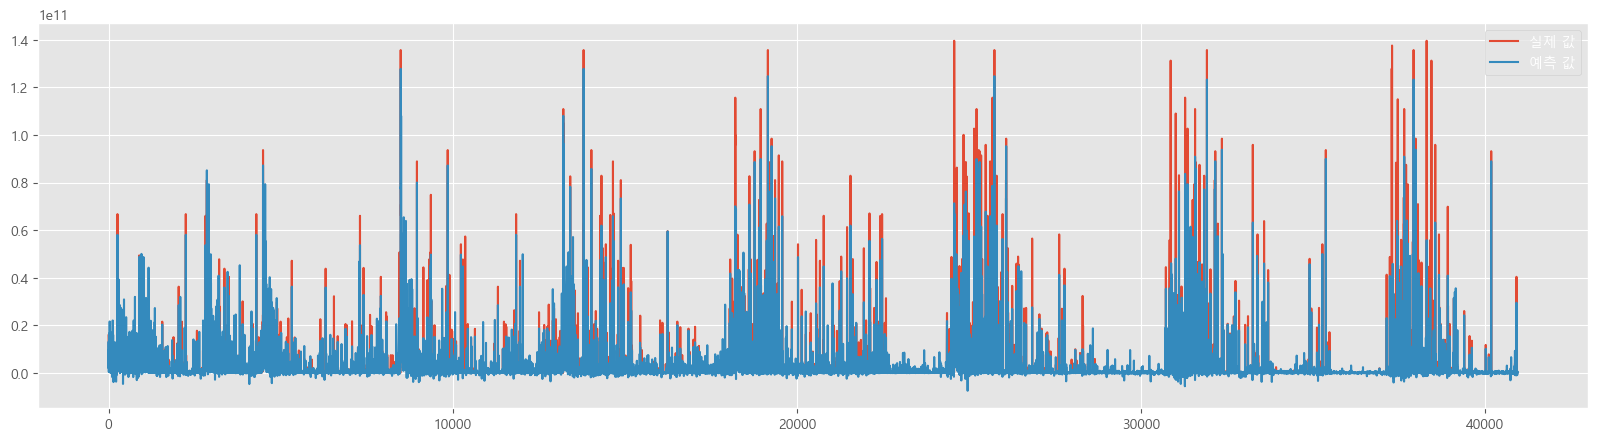

In [98]:
test = pd.DataFrame({
    "실제 값" : y,
    "예측 값": oof
})

test.plot(figsize=(20, 5))

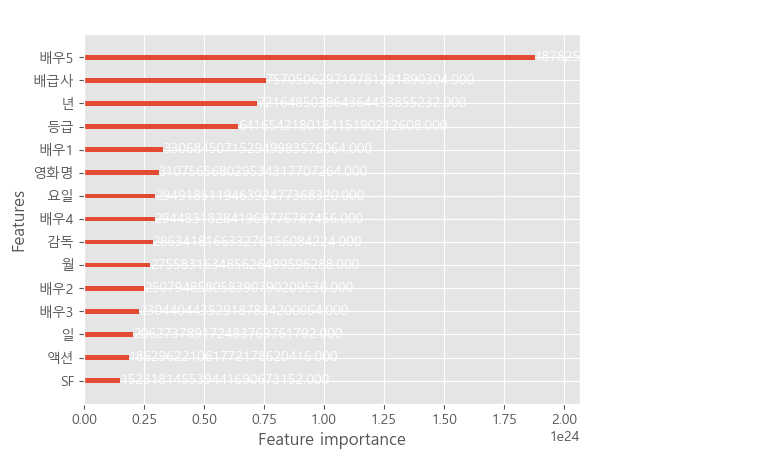

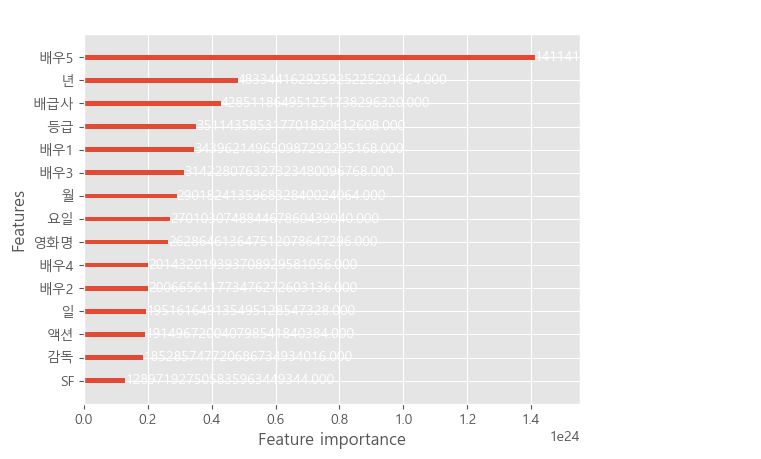

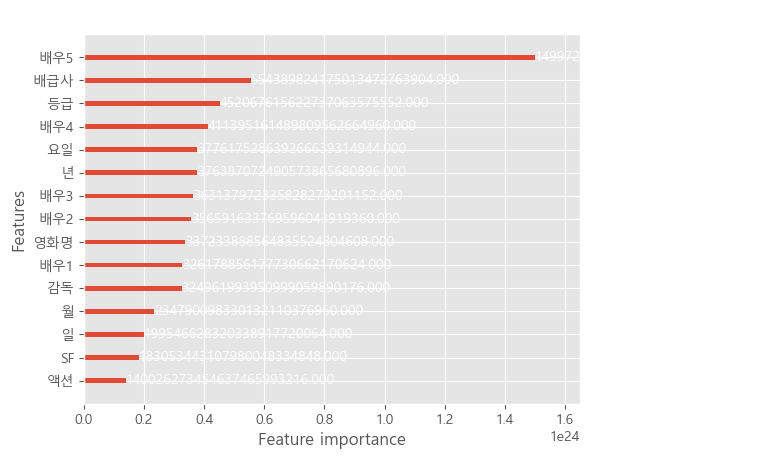

In [102]:
# 각 변수의 중요도 확인

for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

Index(['영화명', '대표국적', '배급사', '등급', '감독', '배우1', '배우2', '배우3'], dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_11772\3623562839.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['개봉일'].fillna('1900-01-01', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\3623562839.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일
0,28783,15687180500,78,39,4,139,4273,3432,2342,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3
1,29130,12777346000,20,537,4,3318,759,3338,1881,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,5,21,4
2,6754,11919939500,78,340,1,6012,4397,2425,537,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,11,5,4
3,5024,11898748500,78,152,1,576,390,4018,3011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2004,9,17,4
4,29051,11658584500,20,558,1,1937,801,4271,2310,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,6,3,3


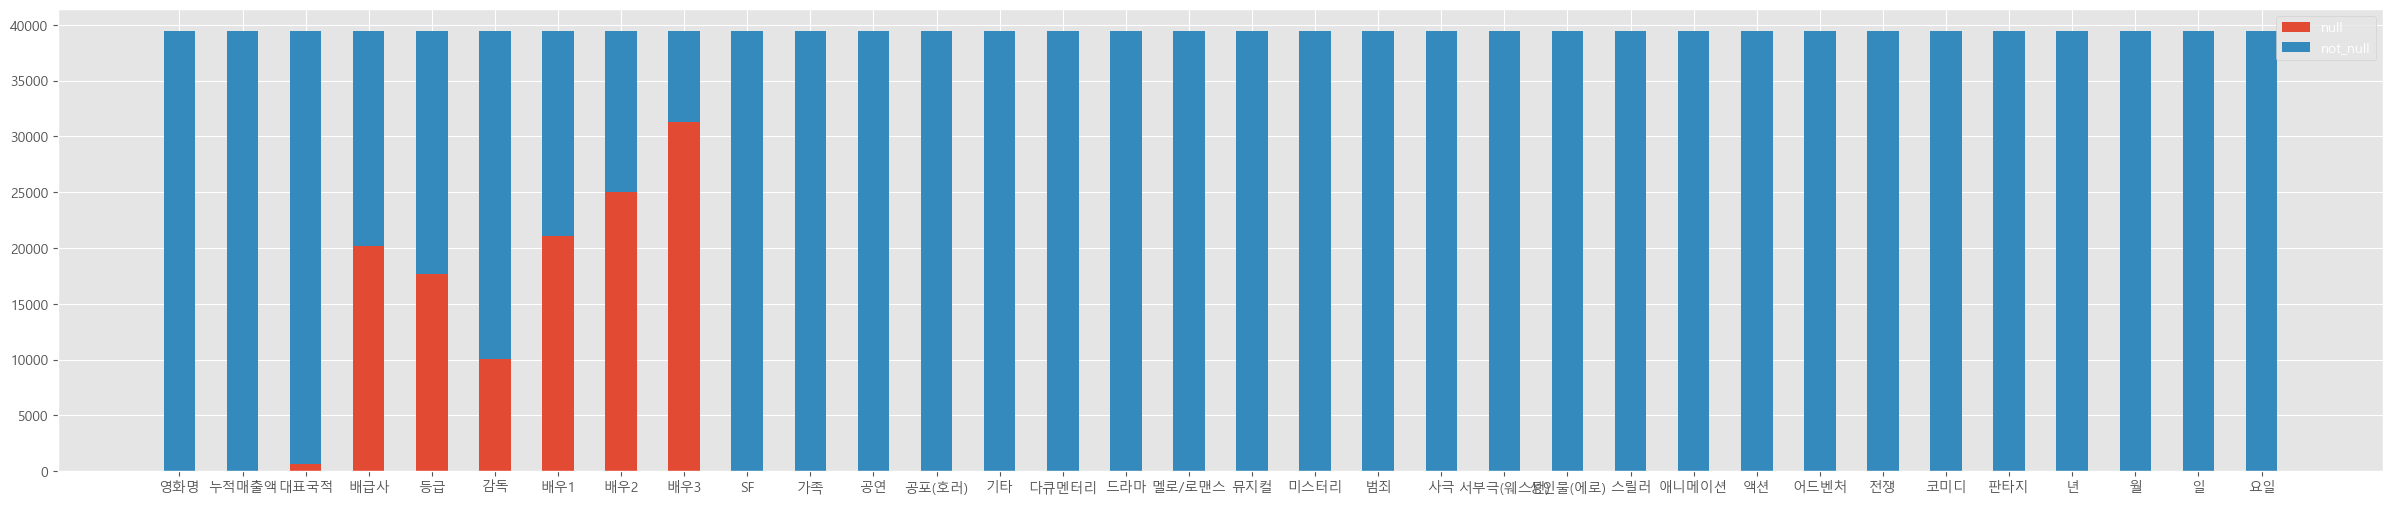

In [228]:
df = dataset.copy()

df = df.drop(['제작사'], axis=1)

for i in range(1, 4):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]

df = df.drop(['배우'], axis=1)

genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df = df.drop(['장르'], axis=1)

df['감독'] = df['감독'].str.split(',').str[0]

df['배급사'] = df['배급사'].str.split(',').str[0]

df['등급'] = df['등급'].str.split(',').str[0]

df['개봉일'].fillna('1900-01-01', inplace=True)

df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df['요일'] = df['개봉일'].dt.weekday    # 0 = 월요일 ~
df = df.drop(['개봉일'], axis=1)

df.drop(df[df['누적매출액'] <= 0].index, inplace=True)

null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

categories = df.columns[df.dtypes == "object"]
print(categories)

for cat in categories:
    le = LabelEncoder()

    df[cat].fillna("NaN", inplace=True)
    df[cat] = df[cat].astype(str)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

all_df = df.copy()
all_df.head()

In [ ]:
X = all_df.drop(["누적매출액"], axis=1) # 독립 변수
y = all_df["누적매출액"]                # 종속 변수

folds = 3
kf = KFold(n_splits=folds)

models = [] # fold 별로 작성한 모델을 저장
oof = np.zeros(len(X))  # 해당 데이터를 제외한 나머지 데이터를 이용하여 종속 변수를 예측한 값을 저장
mse = []
mae = []

# lgbm_params = {
#     "objective" : "regression",
#     "random_seed" : 1234,
#     "metric": "mae",
#     "n_estimators" : 20000,
#     "early_stopping_rounds"  : 200,
#     "num_leaves" : 31,
#     "learning_rate" : 0.05,
#     "bagging_fraction" : 0.7,
#     "bagging_seed" : 0,
#     "num_threads" : 4,
#     "colsample_bytree" : 0.7,
#     "min_data_in_leaf" : 1900,
#     "min_split_gain" : 0.00011,
#     "lambda_l2" : 9
# }

lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

for train_index, val_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_valid = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
        
    model_lgb = lgb.train(lgbm_params,
                            lgb_train,
                            valid_sets=lgb_eval,
                            num_boost_round=100
                            )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

    mse.append(mean_squared_error(y_valid, y_pred))
    mae.append(mean_absolute_error(y_valid, y_pred))

    models.append(model_lgb)
    oof[val_index] = y_pred

mean_mse = np.mean(mse)
mean_mae = np.mean(mae)

print("----------------------------------------------------------------------------------------------------------------------------------------------------")
print("평균 MSE:", mean_mse)
print("평균 MAE:", mean_mae)

<Axes: >

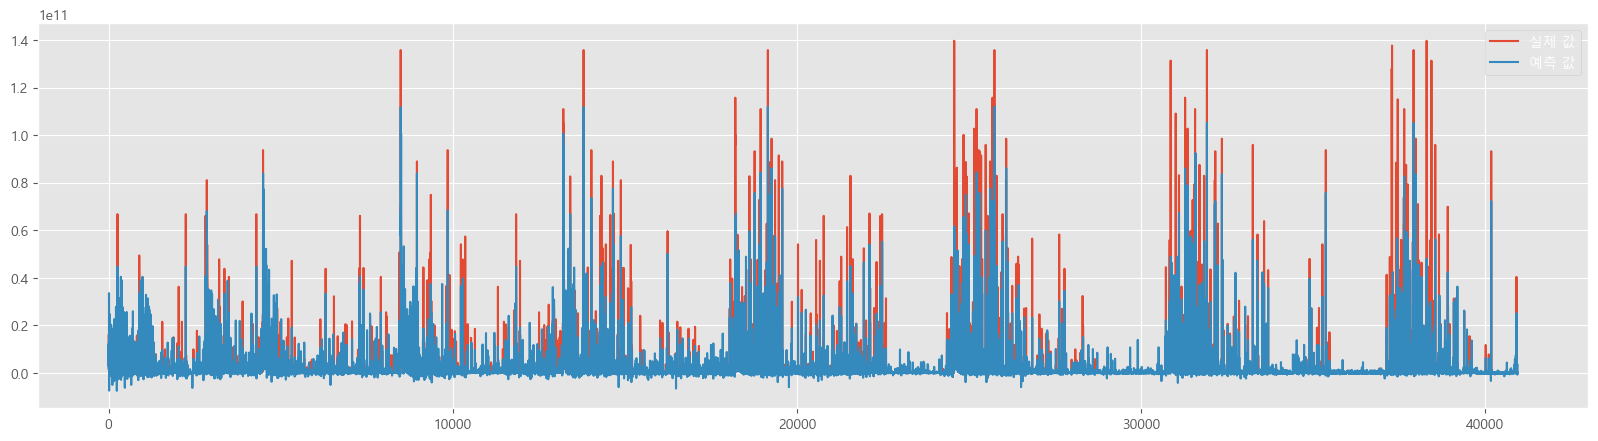

In [216]:
test = pd.DataFrame({
    "실제 값" : y,
    "예측 값": oof
})

test.plot(figsize=(20, 5))

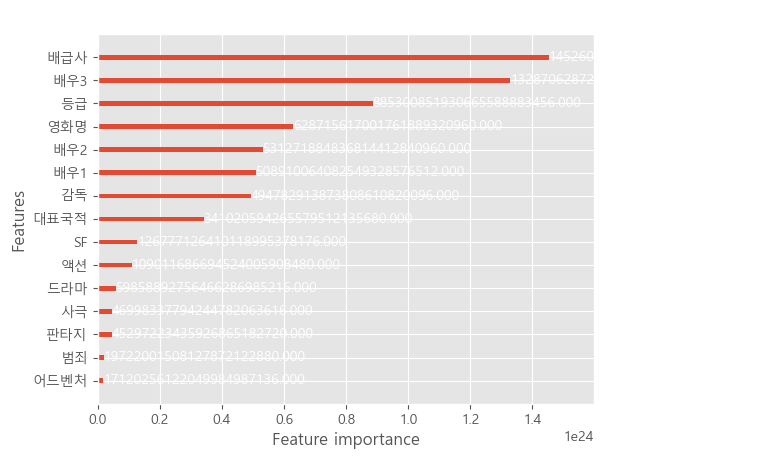

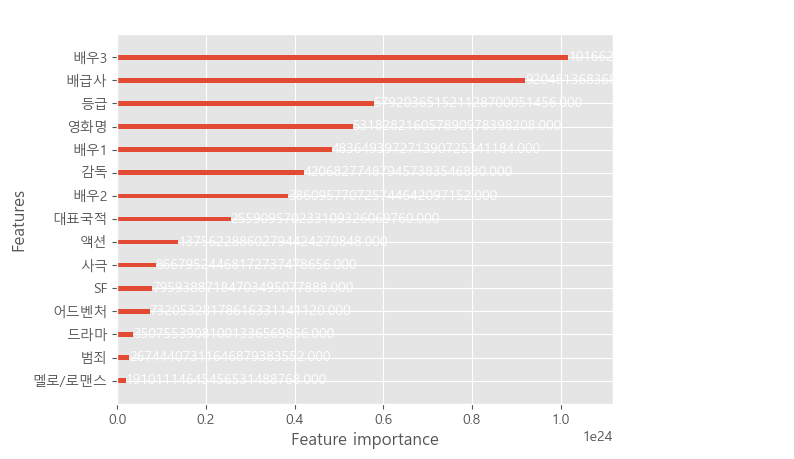

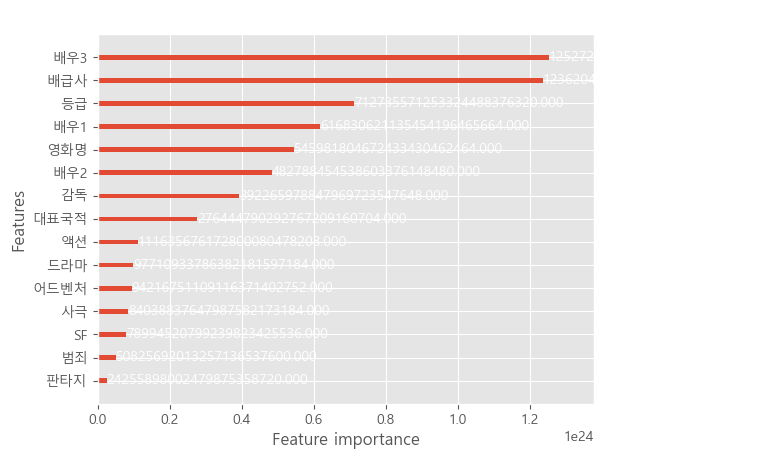

In [219]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [235]:
import optuna
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

def objective(trial):
    params = {
        'objective': 'regression',
        'random_seed' : 1234,
        'learning_rate' : 0.05,
        'n_estimators' : 1000,
        'num_leaves': trial.suggest_int('num_leaves', 4, 64),
        'max_bin' : trial.suggest_int('max_bin', 50, 200),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 16),
        'min_sum_hessian_in_leaf' : trial.suggest_int('min_sum_hessian_in_leaf', 1, 10),
    }
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(params,
                         lgb_train,
                         valid_sets=lgb_eval,
                         num_boost_round=100
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2024-04-24 20:19:52,336] A new study created in memory with name: no-name-f21a4d52-4c41-4aa0-9c6e-4f18b3bf1157
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it i

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:19:53,465] Trial 0 finished with value: 2634093108.1506515 and parameters: {'num_leaves': 37, 'max_bin': 157, 'bagging_fraction': 0.7013816880358219, 'bagging_freq': 6, 'feature_fraction': 0.6118273996694523, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 2634093108.1506515.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1409
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:19:55,198] Trial 1 finished with value: 2499776316.8476152 and parameters: {'num_leaves': 58, 'max_bin': 195, 'bagging_fraction': 0.5917207594128888, 'bagging_freq': 8, 'feature_fraction': 0.6644474598764523, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 1 with value: 2499776316.8476152.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:19:55,579] Trial 2 finished with value: 3789163404.6677914 and parameters: {'num_leaves': 8, 'max_bin': 63, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 9, 'feature_fraction': 0.7890783754749253, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 10}. Best is trial 1 with value: 2499776316.8476152.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:19:57,187] Trial 3 finished with value: 2456711304.4061 and parameters: {'num_leaves': 52, 'max_bin': 119, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 2, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:19:58,236] Trial 4 finished with value: 2676812832.8766675 and parameters: {'num_leaves': 35, 'max_bin': 112, 'bagging_fraction': 0.5322778060523135, 'bagging_freq': 8, 'feature_fraction': 0.6280751661082743, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:19:59,346] Trial 5 finished with value: 2622767421.478319 and parameters: {'num_leaves': 41, 'max_bin': 142, 'bagging_fraction': 0.7084669984373785, 'bagging_freq': 10, 'feature_fraction': 0.7409101495517417, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppDa

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:00,666] Trial 6 finished with value: 2511618161.5396295 and parameters: {'num_leaves': 46, 'max_bin': 59, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feature_fraction': 0.5051912805369205, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 4}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppDat

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:01,564] Trial 7 finished with value: 2665291664.6865654 and parameters: {'num_leaves': 26, 'max_bin': 136, 'bagging_fraction': 0.6193007567311601, 'bagging_freq': 10, 'feature_fraction': 0.45102240537401406, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 2}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\App

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:02,896] Trial 8 finished with value: 2599228339.9372544 and parameters: {'num_leaves': 43, 'max_bin': 88, 'bagging_fraction': 0.6331553864281532, 'bagging_freq': 3, 'feature_fraction': 0.4794847918227599, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppDat

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:03,534] Trial 9 finished with value: 3388067483.6511 and parameters: {'num_leaves': 12, 'max_bin': 79, 'bagging_fraction': 0.5843625853304821, 'bagging_freq': 9, 'feature_fraction': 0.44855063789653066, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 1}. Best is trial 3 with value: 2456711304.4061.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppData

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:05,163] Trial 10 finished with value: 2382532246.472612 and parameters: {'num_leaves': 63, 'max_bin': 120, 'bagging_fraction': 0.8883805440951686, 'bagging_freq': 7, 'feature_fraction': 0.7696317896991509, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:05,759] Trial 11 finished with value: 3203475182.5265245 and parameters: {'num_leaves': 11, 'max_bin': 94, 'bagging_fraction': 0.45936385947712205, 'bagging_freq': 4, 'feature_fraction': 0.607131497257335, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:06,818] Trial 12 finished with value: 2728424794.694744 and parameters: {'num_leaves': 38, 'max_bin': 90, 'bagging_fraction': 0.6616240267333499, 'bagging_freq': 1, 'feature_fraction': 0.6879732477780897, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:08,029] Trial 13 finished with value: 2564939121.6473184 and parameters: {'num_leaves': 44, 'max_bin': 69, 'bagging_fraction': 0.7581636020592828, 'bagging_freq': 3, 'feature_fraction': 0.49159568100355844, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:09,276] Trial 14 finished with value: 2599813279.9112453 and parameters: {'num_leaves': 54, 'max_bin': 50, 'bagging_fraction': 0.7389082683981151, 'bagging_freq': 3, 'feature_fraction': 0.7675970110612975, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 3}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:10,461] Trial 15 finished with value: 2490877372.3467965 and parameters: {'num_leaves': 39, 'max_bin': 139, 'bagging_fraction': 0.6861259528954367, 'bagging_freq': 3, 'feature_fraction': 0.8763745057584925, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 9}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:11,653] Trial 16 finished with value: 2561445502.5607867 and parameters: {'num_leaves': 46, 'max_bin': 94, 'bagging_fraction': 0.8068989098512387, 'bagging_freq': 4, 'feature_fraction': 0.8405515985555808, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:12,869] Trial 17 finished with value: 2472852338.299211 and parameters: {'num_leaves': 46, 'max_bin': 159, 'bagging_fraction': 0.6506621909633512, 'bagging_freq': 10, 'feature_fraction': 0.7219950996148188, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 7}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:13,364] Trial 18 finished with value: 4204252405.260243 and parameters: {'num_leaves': 5, 'max_bin': 95, 'bagging_fraction': 0.7300867687463426, 'bagging_freq': 3, 'feature_fraction': 0.7090077144994208, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 2}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\AppD

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:14,125] Trial 19 finished with value: 2726174870.417756 and parameters: {'num_leaves': 22, 'max_bin': 136, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 6, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:15,628] Trial 20 finished with value: 2526044848.7625093 and parameters: {'num_leaves': 58, 'max_bin': 105, 'bagging_fraction': 0.6179324626328134, 'bagging_freq': 9, 'feature_fraction': 0.8030969945230428, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 2}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:17,327] Trial 21 finished with value: 2396775563.9968443 and parameters: {'num_leaves': 60, 'max_bin': 157, 'bagging_fraction': 0.8994235032839333, 'bagging_freq': 2, 'feature_fraction': 0.8340630286841071, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:17,997] Trial 22 finished with value: 3084949624.424443 and parameters: {'num_leaves': 11, 'max_bin': 178, 'bagging_fraction': 0.8036594793625054, 'bagging_freq': 6, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:18,928] Trial 23 finished with value: 2463362555.777282 and parameters: {'num_leaves': 31, 'max_bin': 159, 'bagging_fraction': 0.8331911629643146, 'bagging_freq': 10, 'feature_fraction': 0.8279016711963055, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 4}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:20,447] Trial 24 finished with value: 2533263026.1734943 and parameters: {'num_leaves': 48, 'max_bin': 75, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feature_fraction': 0.49999826244820006, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 8}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:21,233] Trial 25 finished with value: 2882095236.681811 and parameters: {'num_leaves': 17, 'max_bin': 102, 'bagging_fraction': 0.8640406467327955, 'bagging_freq': 8, 'feature_fraction': 0.41591946476565395, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:22,278] Trial 26 finished with value: 2529970790.1822577 and parameters: {'num_leaves': 39, 'max_bin': 85, 'bagging_fraction': 0.867106998962397, 'bagging_freq': 7, 'feature_fraction': 0.6678164015124792, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:23,175] Trial 27 finished with value: 2894439592.9759502 and parameters: {'num_leaves': 23, 'max_bin': 110, 'bagging_fraction': 0.5049218744875611, 'bagging_freq': 2, 'feature_fraction': 0.8721861949919668, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:23,906] Trial 28 finished with value: 3104087521.327888 and parameters: {'num_leaves': 17, 'max_bin': 88, 'bagging_fraction': 0.42901458016193783, 'bagging_freq': 5, 'feature_fraction': 0.5558979409970513, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 4}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:24,492] Trial 29 finished with value: 3092366824.4915853 and parameters: {'num_leaves': 14, 'max_bin': 53, 'bagging_fraction': 0.4336248157316243, 'bagging_freq': 7, 'feature_fraction': 0.6268484222780226, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:26,219] Trial 30 finished with value: 2587399921.0957847 and parameters: {'num_leaves': 64, 'max_bin': 82, 'bagging_fraction': 0.7315391015500504, 'bagging_freq': 3, 'feature_fraction': 0.41032549973286436, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:27,070] Trial 31 finished with value: 2595468373.8498006 and parameters: {'num_leaves': 27, 'max_bin': 138, 'bagging_fraction': 0.8155242276180952, 'bagging_freq': 7, 'feature_fraction': 0.8363253277236977, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 8}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:27,765] Trial 32 finished with value: 2861046601.440162 and parameters: {'num_leaves': 15, 'max_bin': 193, 'bagging_fraction': 0.7437441381939076, 'bagging_freq': 3, 'feature_fraction': 0.8736852952444621, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:28,482] Trial 33 finished with value: 2936256777.239207 and parameters: {'num_leaves': 17, 'max_bin': 128, 'bagging_fraction': 0.4128313590272658, 'bagging_freq': 3, 'feature_fraction': 0.6123427343757532, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:29,411] Trial 34 finished with value: 2688367431.4319787 and parameters: {'num_leaves': 20, 'max_bin': 138, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 2, 'feature_fraction': 0.6586895535770572, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 8}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:30,427] Trial 35 finished with value: 2718178938.951788 and parameters: {'num_leaves': 28, 'max_bin': 135, 'bagging_fraction': 0.49163991810703933, 'bagging_freq': 2, 'feature_fraction': 0.6440281403244773, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 10}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:31,852] Trial 36 finished with value: 2483831349.830294 and parameters: {'num_leaves': 50, 'max_bin': 163, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feature_fraction': 0.6760962349612033, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:32,871] Trial 37 finished with value: 2828108848.3043547 and parameters: {'num_leaves': 21, 'max_bin': 86, 'bagging_fraction': 0.45014697113274893, 'bagging_freq': 1, 'feature_fraction': 0.8647646583960953, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 8}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:33,596] Trial 38 finished with value: 2964538100.596367 and parameters: {'num_leaves': 21, 'max_bin': 138, 'bagging_fraction': 0.4319776330604906, 'bagging_freq': 5, 'feature_fraction': 0.8887475698722234, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:35,093] Trial 39 finished with value: 2496597510.6056805 and parameters: {'num_leaves': 62, 'max_bin': 84, 'bagging_fraction': 0.8746594112078407, 'bagging_freq': 10, 'feature_fraction': 0.7996012936761958, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:36,087] Trial 40 finished with value: 2738617528.2919936 and parameters: {'num_leaves': 21, 'max_bin': 178, 'bagging_fraction': 0.7089383459587619, 'bagging_freq': 1, 'feature_fraction': 0.5736167589661099, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:37,263] Trial 41 finished with value: 2733867835.341771 and parameters: {'num_leaves': 33, 'max_bin': 125, 'bagging_fraction': 0.7197362581993618, 'bagging_freq': 4, 'feature_fraction': 0.4684501358427995, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 2}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:38,200] Trial 42 finished with value: 2934778531.4120464 and parameters: {'num_leaves': 35, 'max_bin': 83, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feature_fraction': 0.8864597445115652, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 10}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:39,545] Trial 43 finished with value: 2552977618.3330283 and parameters: {'num_leaves': 51, 'max_bin': 100, 'bagging_fraction': 0.4405506949939984, 'bagging_freq': 5, 'feature_fraction': 0.5161170710854714, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 1}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\A

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:40,976] Trial 44 finished with value: 2546599639.6589227 and parameters: {'num_leaves': 48, 'max_bin': 51, 'bagging_fraction': 0.7852903742513881, 'bagging_freq': 2, 'feature_fraction': 0.4397610412933779, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:41,667] Trial 45 finished with value: 2721536735.667839 and parameters: {'num_leaves': 18, 'max_bin': 113, 'bagging_fraction': 0.6786843956619585, 'bagging_freq': 9, 'feature_fraction': 0.7635221313556642, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 2}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:42,097] Trial 46 finished with value: 3740470565.3048496 and parameters: {'num_leaves': 7, 'max_bin': 95, 'bagging_fraction': 0.5310590746198391, 'bagging_freq': 5, 'feature_fraction': 0.7416406677738403, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:42,906] Trial 47 finished with value: 2736937987.713951 and parameters: {'num_leaves': 27, 'max_bin': 77, 'bagging_fraction': 0.7942727561532594, 'bagging_freq': 1, 'feature_fraction': 0.7484986208624937, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:43,701] Trial 48 finished with value: 2687903218.595275 and parameters: {'num_leaves': 19, 'max_bin': 106, 'bagging_fraction': 0.6937998175981945, 'bagging_freq': 3, 'feature_fraction': 0.5854263996089444, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 10 with value: 2382532246.472612.
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
C:\Users\USER\AppData\Local\Temp\ipykernel_11772\934049993.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
c:\Users\USER\Ap

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 31542, number of used features: 33
[LightGBM] [Info] Start training from score 1356405762.967947


[I 2024-04-24 20:20:44,179] Trial 49 finished with value: 3925084049.1672335 and parameters: {'num_leaves': 6, 'max_bin': 170, 'bagging_fraction': 0.4384782234933164, 'bagging_freq': 6, 'feature_fraction': 0.5534050497725981, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 10 with value: 2382532246.472612.


{'num_leaves': 63,
 'max_bin': 120,
 'bagging_fraction': 0.8883805440951686,
 'bagging_freq': 7,
 'feature_fraction': 0.7696317896991509,
 'min_data_in_leaf': 2,
 'min_sum_hessian_in_leaf': 3}

In [ ]:
# {'num_leaves': 63,
#  'max_bin': 120,
#  'bagging_fraction': 0.8883805440951686,
#  'bagging_freq': 7,
#  'feature_fraction': 0.7696317896991509,
#  'min_data_in_leaf': 2,
#  'min_sum_hessian_in_leaf': 3}